In [2]:
%matplotlib inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [3]:
heart_disease = pd.read_csv("heart_disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
X = heart_disease.drop("target", axis=1)

In [6]:
y = heart_disease["target"]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [10]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
y_preds = clf.predict(X_test)

In [12]:
clf.score(X_train, y_train)

1.0

In [13]:
clf.score(X_test, y_test)

0.8552631578947368

In [14]:
#testing other models:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


In [15]:
models = {"LinearSVC": LinearSVC(),
          "KNN": KNeighborsClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression(),
          "RandomForestClassifier": RandomForestClassifier()}
results = {}

In [18]:
np.random.seed(42)

for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)
    
results

C:\Users\Akshata Patil\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Akshata Patil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'LinearSVC': 0.7631578947368421,
 'KNN': 0.631578947368421,
 'SVC': 0.6052631578947368,
 'LogisticRegression': 0.8421052631578947,
 'RandomForestClassifier': 0.8157894736842105}

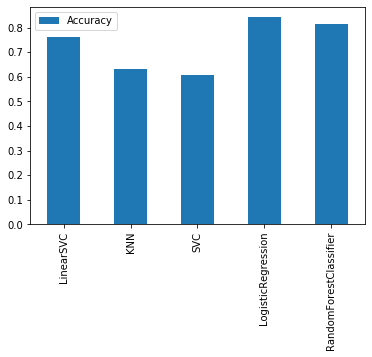

In [19]:
results_df = pd.DataFrame(results.values(), 
                          results.keys(), 
                          columns=["Accuracy"])
results_df.plot.bar();

In [20]:
#hyper parameter tunning:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

In [21]:
np.random.seed(42)
from sklearn.model_selection import RandomizedSearchCV
rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=5,
                                verbose=True)
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


In [22]:
#finding best parameter
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [23]:
#Evaluation:
clf = LogisticRegression(solver="liblinear", C=0.23357214690901212)
clf.fit(X_train, y_train);

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [25]:
y_preds = clf.predict(X_test)

In [26]:
confusion_matrix(y_test, y_preds)

array([[28, 10],
       [ 2, 36]], dtype=int64)

In [27]:
precision_score(y_test, y_preds)

0.782608695652174

In [28]:
recall_score(y_test, y_preds)

0.9473684210526315

In [29]:
f1_score(y_test, y_preds)

0.8571428571428571